In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv (1) (1)')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


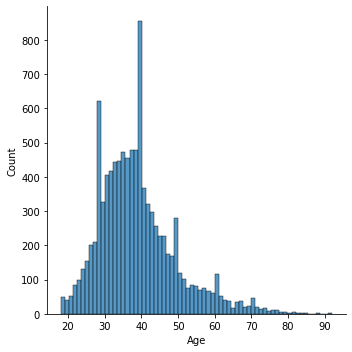

In [ ]:
sns.displot(df['Age'])

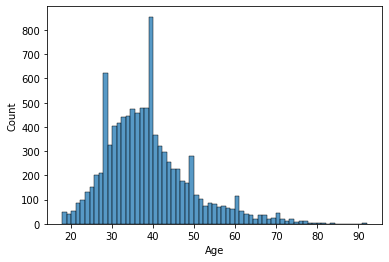

In [ ]:
sns.histplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


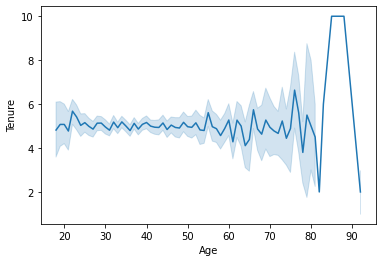

In [ ]:
sns.lineplot(df['Age'],df['Tenure'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


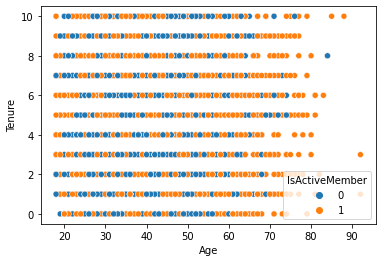

In [ ]:
sns.scatterplot(df['Age'],df['Tenure'],hue=df['IsActiveMember'])

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892108e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [ ]:
df.mode()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,Smith,850.0,France,Male,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography           True
Gender              True
Age                 True
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             2
Age                3
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.quantile([0.1])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.1,1000.9,15591167.1,521.0,27.0,1.0,0.0,1.0,0.0,0.0,20273.58,0.0


In [ ]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
oneh=preprocessing.OneHotEncoder()
df['Age']=le.fit_transform(df['Age'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,24,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,23,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,24,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,21,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,25,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=df.iloc[:,0:12]
x

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   24   
1             2    15647311       Hill          608     Spain  Female   23   
2             3    15619304       Onio          502    France  Female   24   
3             4    15701354       Boni          699    France  Female   21   
4             5    15737888   Mitchell          850     Spain  Female   25   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   21   
9996       9997    15569892  Johnstone          516    France    Male   17   
9997       9998    15584532        Liu          709    France  Female   18   
9998       9999    15682355  Sabbatini          772   Germany    Male   24   
9999      10000    15628319     Walker          792    France  Female   10   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [ ]:
y=df['Balance']
y

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [ ]:
x=df.iloc[:,0:1]
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc= StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-1.73187761],
       [-1.7315312 ],
       [-1.73118479],
       ...,
       [ 1.73118479],
       [ 1.7315312 ],
       [ 1.73187761]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_tedt,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=0)
x_train

array([[ 0.92889885],
       [ 1.39655257],
       [-0.4532777 ],
       ...,
       [-0.60119484],
       [ 1.67853045],
       [-0.78548505]])

In [ ]:
x_train.shape

(7000, 1)

In [ ]:
y_train

7681    146193.60
9031         0.00
3691    160979.68
202          0.00
5625    143262.04
          ...    
9225    120074.97
4859    114440.24
3264    161274.05
9845         0.00
2732    108076.33
Name: Balance, Length: 7000, dtype: float64